In [16]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

In [17]:
# Import csv and create dataframe
df = pd.read_csv('Digital Analyst AB Test Data.csv')
df.sort_values(by=["User ID"], inplace=True, ignore_index=True)
print(df.head())

   User ID   Device                    Variant Converted
0        1  Desktop  Control - Original Button       Yes
1        2  Desktop  Control - Original Button       Yes
2        3  Desktop  Control - Original Button       Yes
3        4  Desktop  Control - Original Button       Yes
4        5  Desktop  Control - Original Button       Yes


In [18]:
# Print shape of dataframe
print(df.shape)

(900, 4)


In [33]:
# Define function to analyze satistically each variant for each device with normal distribution
def conversion_rate_significance(df, device_type):
    """This function analyze the conversion rates for the device type comparing the variant A to the variant B"""
    data_a = df[(df["Device"] == device_type) & (df['Variant'] == 'Control - Original Button')]
    data_b = df[(df["Device"] == device_type) & (df['Variant'] == 'Experiment - New Button Copy')]

    # Creation of DataFrames of conversions
    df_conversions_a = data_a[data_a.Converted == 'Yes']
    df_conversions_b = data_b[data_b.Converted == 'Yes']

    # Calculate Desktop Conversions and visitors for Variant A
    visitors_a = len(data_a)
    conversions_a = len(df_conversions_a)

    # Calculate Desktop Conversions and visitors for Variant B
    visitors_b = len(data_b)
    conversions_b = len(df_conversions_b)

    # Calculate statistical values
    conversion_rate_a = conversions_a / visitors_a
    conversion_rate_b = conversions_b / visitors_b
    relative_uplift = (conversion_rate_b - conversion_rate_a) / conversion_rate_a

    # Calculate standard errors
    standard_error_a = (conversion_rate_a * (1 - conversion_rate_a) / visitors_a) ** 0.5
    standard_error_b = (conversion_rate_b * (1 - conversion_rate_b) / visitors_b) ** 0.5
    standard_error_difference = (np.square(standard_error_a) + np.square(standard_error_b)) ** 0.5

    # Calculate confidence intervals for plotting
    inf_limit_a = round((conversion_rate_a - (1.96 * standard_error_a)), 2)
    sup_limit_a = round((conversion_rate_a + (1.96 * standard_error_a)), 2)

    inf_limit_b = round((conversion_rate_b - (1.96 * standard_error_b)), 2)
    sup_limit_b = round((conversion_rate_b + (1.96 * standard_error_b)), 2)

    plotting_data = {'inf_lim_a': inf_limit_a, 'sup_lim_a': sup_limit_a, 'inf_lim_b': inf_limit_b, 'sup_lim_b': sup_limit_b, 'error_a': standard_error_a, 'error_b': standard_error_b, 'conversion_rate_a': conversion_rate_a, 'conversion_rate_b': conversion_rate_b}

    # Calculate Z-score
    z_score = (conversion_rate_b - conversion_rate_a) / standard_error_difference

    # Calculate p-value for two-tailed test
    p_value = scipy.stats.norm.sf(abs(z_score)) * 2

    # Print Results for Desktop device
    print("The results for the " + device_type + " device are the following:")
    print("")
    print("Null hypothesis (Ho): The type of variant does not affect the number of conversions")
    print("Alternative hypothesis (H1): The type of variant affects the number of conversions")
    print("")
    print("Variant A = Control - Original Button")
    print("Variant B = Experiment - New Button Copy \n")
    print("For Variant A:")
    print("Visitors: " + str(visitors_a) + " | Conversions: " + str(conversions_a))
    print("")
    print("For Variant B:")
    print("Visitors: " + str(visitors_b) + " | Conversions: " + str(conversions_b))
    print("")
    print("The conversion rate for variant A is: " + str(round((conversion_rate_a * 100), 2)) + "%.")
    print("The conversion rate for variant B is: " + str(round((conversion_rate_b * 100), 2)) + "%.")
    print("The relative uplift in conversation rate is: " + str(round((relative_uplift * 100), 2)) + "%.\n")
    print("The Z_score for the desktop analysis is: " + str(round(z_score, 4)))
    print("The p-value for the desktop analysis is: " + str(round(p_value, 4)) + str("\n"))

    if p_value > 0.05:
        print("Since the p-value is higher than the level of significance (0.05) the null hypothesis is accepted")
        print("It can be inferred with a 95% of confidence that the difference in conversion rate is not significant")
    else:
        print("Since the p-value is lower than the level of significance (0.05) the null hypothesis is rejected")
        print("It can be inferred with a 95% of confidence that the difference in conversion rate is significant")

    return plotting_data

In [34]:
# Define function to plot conversion rates per device
def plot_conversion_rates(values, device_type, x_lim, x_sup):
    """This function plots the conversion rates for each variation along with its confidence intervals"""

    # Plot Variant A
    plt.plot(([values['inf_lim_a'], values['sup_lim_a']]), (1, 1), '|-', color='black', label='Control',
             markersize=20)
    plt.plot((values['conversion_rate_a']), 1, 'o', color='#f44336')

    # Plot Variant B
    plt.plot(([values['inf_lim_b'], values['sup_lim_b']]), (2, 2), '|-', color='black', label='Experimental',
             markersize=20)
    plt.plot((values['conversion_rate_b']), 2, 'o', color='#f44336')

    # Set axis
    plt.yticks((0, 1, 2, 3), ('', 'Control', 'Experiment', ''))
    plt.xlim(x_lim, x_sup)
    plt.xlabel("Conversion Rate in percentage")

    # Set title
    plt.title(device_type + ' conversion rate per variation')

    plt.show()

In [35]:
# Analysis for Desktop Device
desktop = conversion_rate_significance(df=df, device_type="Desktop")

The results for the Desktop device are the following:

Null hypothesis (Ho): The type of variant does not affect the number of conversions
Alternative hypothesis (H1): The type of variant affects the number of conversions

Variant A = Control - Original Button
Variant B = Experiment - New Button Copy 

For Variant A:
Visitors: 150 | Conversions: 80

For Variant B:
Visitors: 150 | Conversions: 95

The conversion rate for variant A is: 53.33%.
The conversion rate for variant B is: 63.33%.
The relative uplift in conversation rate is: 18.75%.

The Z_score for the desktop analysis is: 1.7657
The p-value for the desktop analysis is: 0.0774

Since the p-value is higher than the level of significance (0.05) the null hypothesis is accepted
It can be inferred with a 95% of confidence that the difference in conversion rate is not significant


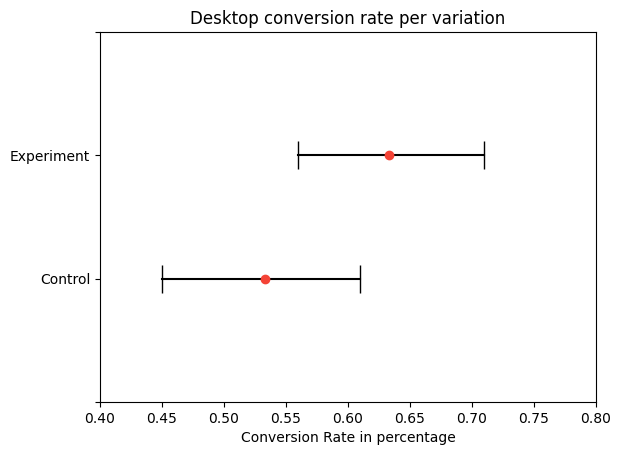

In [36]:
# Plot the conversion rates for Desktop
plot_conversion_rates(desktop, 'Desktop', x_lim=0.4, x_sup=0.8)

In [37]:
# Analysis for Mobile Device
mobile = conversion_rate_significance(df=df, device_type="Mobile")

The results for the Mobile device are the following:

Null hypothesis (Ho): The type of variant does not affect the number of conversions
Alternative hypothesis (H1): The type of variant affects the number of conversions

Variant A = Control - Original Button
Variant B = Experiment - New Button Copy 

For Variant A:
Visitors: 197 | Conversions: 54

For Variant B:
Visitors: 203 | Conversions: 37

The conversion rate for variant A is: 27.41%.
The conversion rate for variant B is: 18.23%.
The relative uplift in conversation rate is: -33.51%.

The Z_score for the desktop analysis is: -2.1992
The p-value for the desktop analysis is: 0.0279

Since the p-value is lower than the level of significance (0.05) the null hypothesis is rejected
It can be inferred with a 95% of confidence that the difference in conversion rate is significant


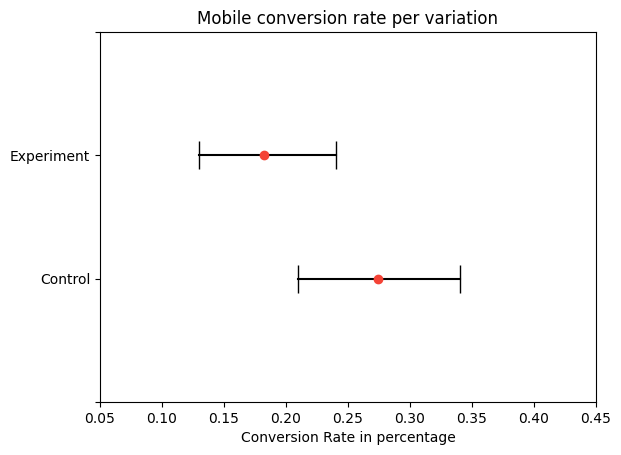

In [38]:
# Plot the conversion rates for Mobile
plot_conversion_rates(mobile, 'Mobile', x_lim=0.05, x_sup=0.45)

In [39]:
# Analysis for Tablet Device
tablet = conversion_rate_significance(df=df, device_type="Tablet")

The results for the Tablet device are the following:

Null hypothesis (Ho): The type of variant does not affect the number of conversions
Alternative hypothesis (H1): The type of variant affects the number of conversions

Variant A = Control - Original Button
Variant B = Experiment - New Button Copy 

For Variant A:
Visitors: 100 | Conversions: 36

For Variant B:
Visitors: 100 | Conversions: 42

The conversion rate for variant A is: 36.0%.
The conversion rate for variant B is: 42.0%.
The relative uplift in conversation rate is: 16.67%.

The Z_score for the desktop analysis is: 0.8715
The p-value for the desktop analysis is: 0.3835

Since the p-value is higher than the level of significance (0.05) the null hypothesis is accepted
It can be inferred with a 95% of confidence that the difference in conversion rate is not significant


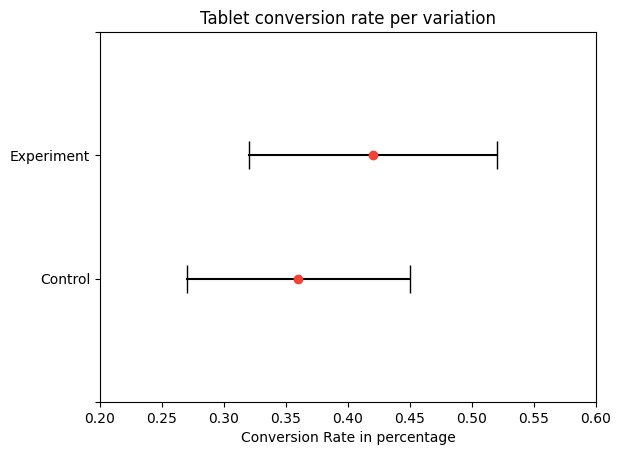

In [40]:
# Plot the conversion rates for Tablet
plot_conversion_rates(tablet, 'Tablet', x_lim=0.2, x_sup=0.6)